In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Flatten

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

<h3 dir="rtl">
دیتا را از دیتاست
mnist
از کتاب خانه ی
tensorflow
می خوانیم.
<h3>

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

<h3 dir="rtl">
(یک نمونه از دیتاهای دیتاست.)
<h3>

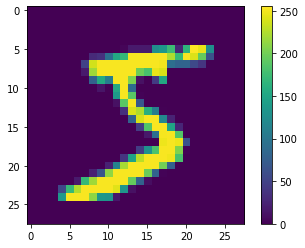

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

<h3 dir="rtl">
ابتدا باید لیبل ها را به صورت
categorical
در بیاوریم تا بتوانیم مدل را روی آن ها اجرا کنیم.

اما قبل از آن از لیبل ها کپی می گیریم تا برای محاسبه ی دقت از آن ها استفاده کنیم.
<h3>

In [ ]:
y_train_copy, y_test_copy = y_train, y_test
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(784, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<h3 dir="rtl">
مدل را تشکیل می دهیم. و میزان
accuracy
و
loss
را به ازای
Epoch
های مختلف محاسبه می کنیم.
مشاهده می شود که با بیشتر شدن تعداد
Epoch
ها دقت بیشتر می شود و میزان
loss
کمتر می شود.

البته می دانیم که محاسبه ی این ارقام بر داده های
train
تخمین خوبی از مدل به ما ارائه نخواهد کرد.
<h3>

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 1.2388 - accuracy: 0.8186
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3039 - accuracy: 0.9257
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1765 - accuracy: 0.9539
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1404 - accuracy: 0.9635
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1315 - accuracy: 0.9660


<h3 dir="rtl">
نمونه ی اول دیتای تست که برای بررسی
accuracy
استفاده می شوند.
<h3>

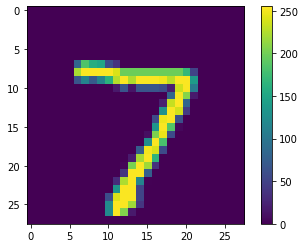

In [ ]:
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

<h3 dir="rtl">
برچسب داده های تست را با استفاده از مدل پیشبینی می کنیم.
<h3>

In [ ]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

x test number 0


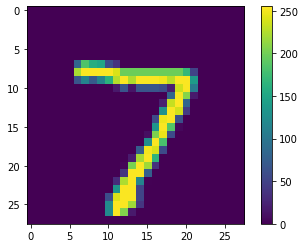

label:7     --------     prediction: 7
-----------------------------------------------------------
x test number 1


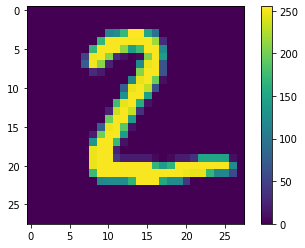

label:2     --------     prediction: 2
-----------------------------------------------------------
x test number 2


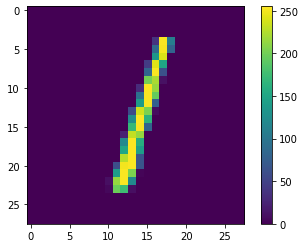

label:1     --------     prediction: 1
-----------------------------------------------------------
x test number 3


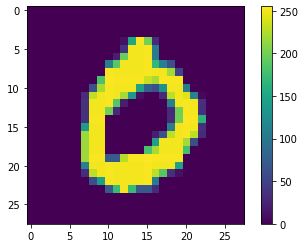

label:0     --------     prediction: 0
-----------------------------------------------------------
x test number 4


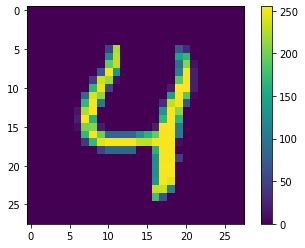

label:4     --------     prediction: 4
-----------------------------------------------------------


In [ ]:
for i in range(5):
  print(f"x test number {i}")
  plt.figure()
  plt.imshow(x_test[i])
  plt.colorbar()
  plt.grid(False)
  plt.show()

  print(f"label:{y_test_copy[i]}     --------     prediction: {y_predict[i]}")
  print("-----------------------------------------------------------")

<h3 dir="rtl">
میزان
accuracy
را بر روی داده های تست محاسبه می کنیم.
<h3>

In [ ]:
accuracy_score(y_test_copy, y_predict)

0.966